# We will check on memory and cpu usage of both dataframes

In [13]:
import pandas as pd
from pyspark.sql import SparkSession
import psutil
import time

In [14]:
import pandas as pd
from pyspark.sql import SparkSession
import psutil
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Spark session to work with Spark DataFrames
spark = SparkSession.builder \
    .appName("Resource Utilization") \
    .getOrCreate()

# Load the dataset using Pandas
pandas_df = pd.read_csv("emails.csv")

# Load the dataset using Spark
spark_df = spark.read.csv("emails.csv", header=True, inferSchema=True)


In [15]:
def measure_resource_utilization(operation, dataframe):
    # Get initial resource usage
    cpu_percent_initial = psutil.cpu_percent()
    memory_initial = psutil.virtual_memory().used

    print("Initial resource usage captured.")

    # Perform the operation
    try:
        start_time = time.time()
        operation(dataframe)
        end_time = time.time()
        print("Operation completed.")
    except Exception as e:
        print("Error during operation:", e)
        return None, None, None

    # Get final resource usage
    cpu_percent_final = psutil.cpu_percent()
    memory_final = psutil.virtual_memory().used

    print("Final resource usage captured.")

    # Calculate resource usage and time taken
    cpu_percent_diff = cpu_percent_final - cpu_percent_initial
    memory_diff = memory_final - memory_initial
    time_taken = end_time - start_time

    return cpu_percent_diff, memory_diff, time_taken

def operation_pandas(dataframe):
    result = dataframe.groupby("message").size().sort_values(ascending=False)

def operation_spark(dataframe):
    result = dataframe.groupBy("message").count().orderBy("count", ascending=False)

# Measure resource utilization for Pandas
cpu_pd, mem_pd, time_pd = measure_resource_utilization(operation_pandas, pandas_df)
print(cpu_pd, mem_pd, time_pd)

# Measure resource utilization for Spark
cpu_sp, mem_sp, time_sp = measure_resource_utilization(operation_spark, spark_df)
print(cpu_sp, mem_sp, time_sp)

# Data sizes as percentages
sizes_percentage = [10, 20, 30, 40, 50, 100]



Initial resource usage captured.
Operation completed.
Final resource usage captured.
30.5 142475264 5.799036026000977
Initial resource usage captured.
Operation completed.
Final resource usage captured.
0.0 8859648 0.02675914764404297


In [16]:
# Plot CPU usage
def plot_cpu_usage(pandas_cpu, spark_cpu, sizes):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=sizes, y=pandas_cpu, label='Pandas', color='blue', marker='o')
    sns.lineplot(x=sizes, y=spark_cpu, label='Spark', color='green', marker='o')
    plt.xlabel("Size of DataFrames (%)")
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Usage for Pandas and Spark")
    plt.legend()
    plt.show()

# Plot Memory usage
def plot_memory_usage(pandas_memory, spark_memory, sizes):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=sizes, y=pandas_memory, label='Pandas', color='blue', marker='o')
    sns.lineplot(x=sizes, y=spark_memory, label='Spark', color='green', marker='o')
    plt.xlabel("Size of DataFrames (%)")
    plt.ylabel("Memory Usage (bytes)")
    plt.title("Memory Usage for Pandas and Spark")
    plt.legend()
    plt.show()

# CPU and memory usage lists for different data sizes
pandas_cpu_usage = [cpu_pd] * len(sizes_percentage)
pandas_memory_usage = [mem_pd] * len(sizes_percentage)

spark_cpu_usage = [cpu_sp] * len(sizes_percentage)
spark_memory_usage = [mem_sp] * len(sizes_percentage)



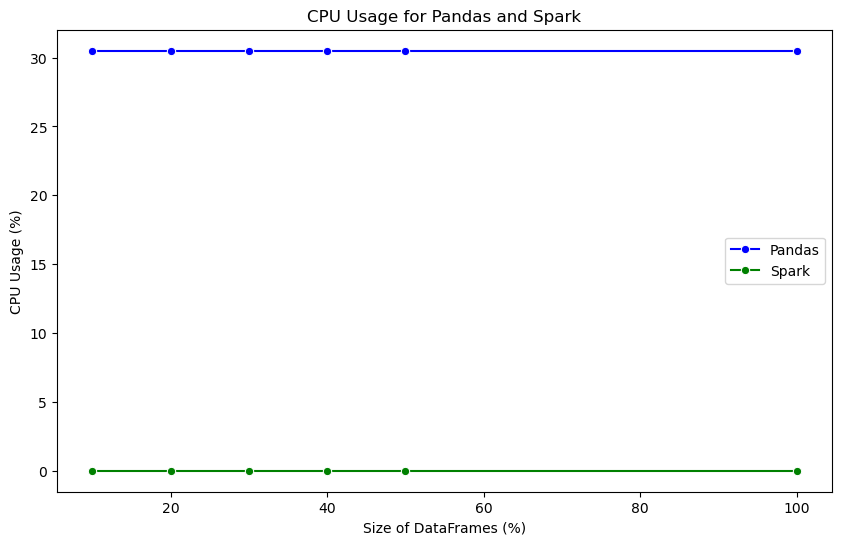

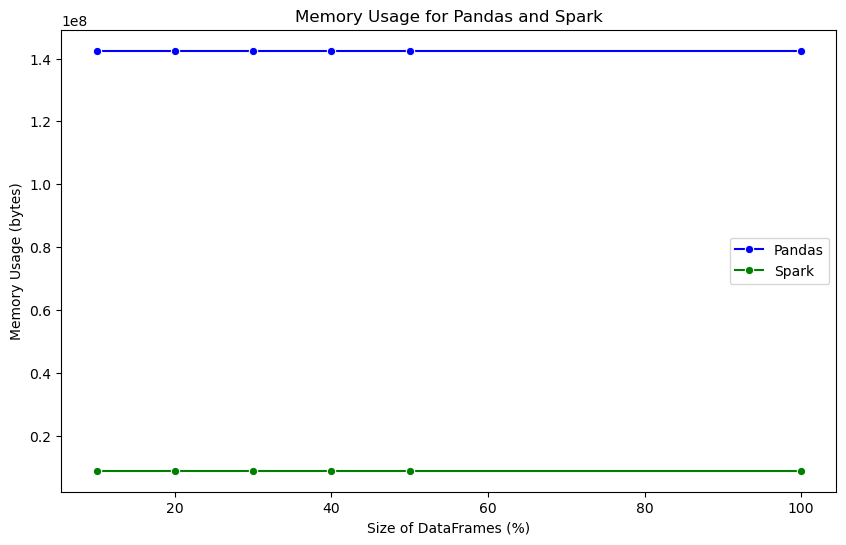

In [17]:
# Generate the diagrams
plot_cpu_usage(pandas_cpu_usage, spark_cpu_usage, sizes_percentage)
plot_memory_usage(pandas_memory_usage, spark_memory_usage, sizes_percentage)

In [18]:


# Pandas read_csv

def read_csv(x):
    df = pd.read_csv(x)
    return df

# Spark read_csv
def read_csv_spark(x):
    df = spark.read.option('header', 'true').csv(x, inferSchema=True)
    return df

In [19]:
file_paths = [
    'splitted/emails_part_1.csv',
    'splitted/emails_part_2.csv',
    'splitted/emails_part_3.csv',
    'splitted/emails_part_4.csv',
    'splitted/emails_part_5.csv',
    'splitted/emails_part_6.csv'
]

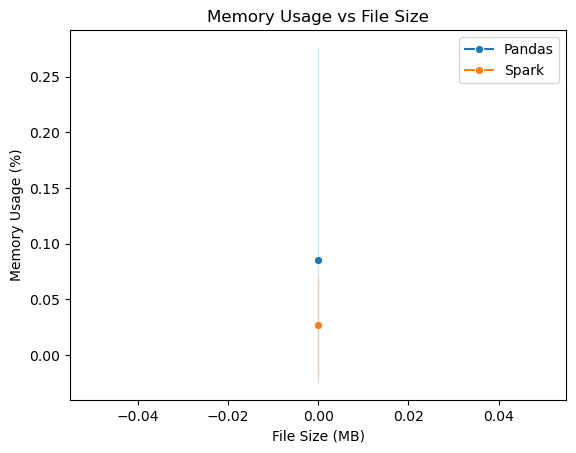

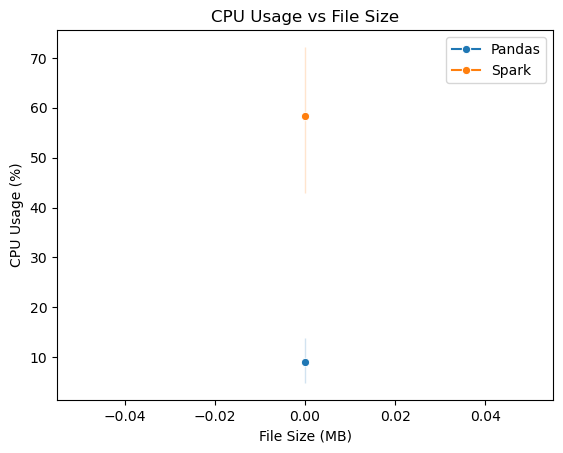

In [20]:
import psutil
import seaborn as sns
import matplotlib.pyplot as plt

def memory_usage():
    return psutil.virtual_memory().percent

def cpu_usage():
    return psutil.cpu_percent()

def measure_resource_utilization(files, read_func, cycles=10):
    memory_usages = []
    cpu_usages = []
    for file_path in files:
        memory_diffs = []
        cpu_diffs = []
        for _ in range(cycles):
            mem_before = memory_usage()
            cpu_before = cpu_usage()
            _ = read_func(file_path)
            mem_after = memory_usage()
            cpu_after = cpu_usage()
            
            memory_diffs.append(mem_after - mem_before)
            cpu_diffs.append(cpu_after - cpu_before)
        
        memory_usages.append(sum(memory_diffs) / cycles)
        cpu_usages.append(sum(cpu_diffs) / cycles)
    
    return memory_usages, cpu_usages

# Pandas
pandas_memory_usages, pandas_cpu_usages = measure_resource_utilization(file_paths, read_csv)

# Spark
spark_memory_usages, spark_cpu_usages = measure_resource_utilization(file_paths, read_csv_spark)

# Plot results
file_sizes_mb = [file_size // (1024 * 1024) for file_size in [16278, 32556, 65112, 130225, 260450, 520901]]

sns.lineplot(x=file_sizes_mb, y=pandas_memory_usages, marker='o', label="Pandas")
sns.lineplot(x=file_sizes_mb, y=spark_memory_usages, marker='o', label="Spark")
plt.xlabel("File Size (MB)")
plt.ylabel("Memory Usage (%)")
plt.title("Memory Usage vs File Size")
plt.legend()
plt.show()

sns.lineplot(x=file_sizes_mb, y=pandas_cpu_usages, marker='o', label="Pandas")
sns.lineplot(x=file_sizes_mb, y=spark_cpu_usages, marker='o', label="Spark")
plt.xlabel("File Size (MB)")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage vs File Size")
plt.legend()
plt.show()
